# Analysing Machine Learning Models with Yellowbrick


## Model Selection Process

* selecting and/or engineering the smallest and most predictive feature set
* choosing a set of algorithms from a model family
* tuning the algorithm hyperparameters to optimize performance

## Installation

In [360]:
#via pip
#!pip install yellowbrick
#via conda
#!conda install -c districtdatalabs yellowbrick

### Import libraries

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

### Data set

In [337]:
df = pd.read_csv('data/occupancy/occupancy.csv')

A first look at data

In [338]:
df.head()

,datetime,temperature,relative humidity,light,C02,humidity,occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


## Specifying the feature and target column

In [340]:

feature_names = [
    'temperature', 'relative humidity', 'light', 'C02',
       'humidity',
    ]

target_name = 'occupancy'

X = df[feature_names]
y = df[target_name]

## Feature Analysis

### Rank 1D

A one dimensional ranking of features utilizes a ranking algorithm that takes into account only a single feature at a time (e.g. histogram analysis). By default we utilize the Shapiro-Wilk algorithm to assess the normality of the distribution of instances with respect to the feature. A barplot is then drawn showing the relative ranks of each feature.

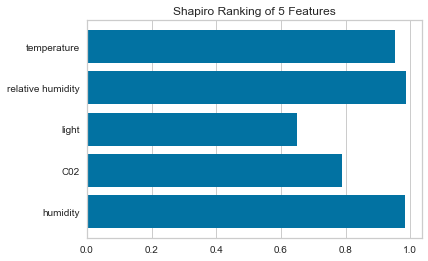

In [341]:
from yellowbrick.features import Rank1D

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=feature_names, algorithm='shapiro')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

### Rank 2D
Use Rank2D for pairwise feature
analysis, find strong correlations

● Feature engineering requires
understanding of the relationships
between features

● Visualize pairwise relationships as
a heatmap

● Pearson shows us strong
correlations, potential collinearity

● Covariance helps us understand
the sequence of relationships

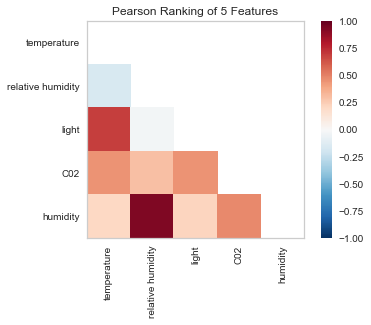

In [342]:
from yellowbrick.features import Rank2D 

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=feature_names, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

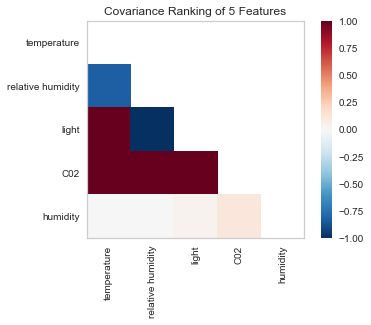

In [361]:
from yellowbrick.features import Rank2D 

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=feature_names, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()     

### RadViz
RadViz is a multivariate data visualization algorithm that plots each feature dimension uniformly around the circumference of a circle and then plots data points on the interior of the circle. This allows many dimensions to easily fit on a circle, greatly expanding the dimensionality of the visualization.

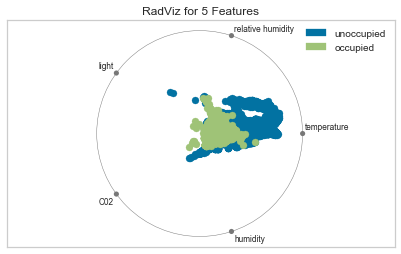

In [362]:
from yellowbrick.features import RadViz

# Specify the features of interest and the classes of the target 
features = feature_names
classes = ['unoccupied', 'occupied']



# Instantiate the visualizer
visualizer = visualizer = RadViz(classes=classes, features=features,size = (500,300))

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

### Parallel Coordinates
This technique is useful when we need to detect clusters of instances that have similar classes, and to note features that have high variance or different distributions. Points that tend to cluster will appear closer together.

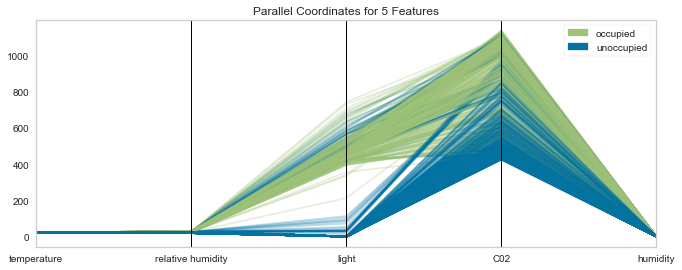

In [344]:
from yellowbrick.features import ParallelCoordinates

# Instantiate the visualizer
visualizer = visualizer = ParallelCoordinates(
    classes=classes, features=features,
    sample=0.1, size = (800,300)
)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

### Parallel Coordinates Normalised

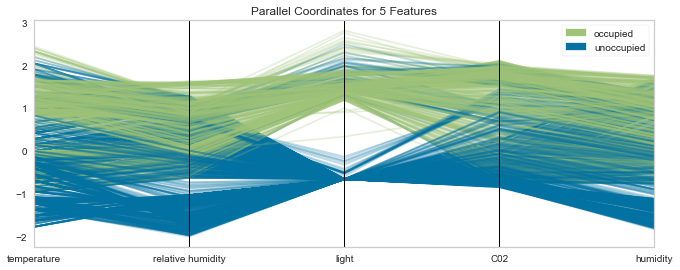

In [363]:
from yellowbrick.features import ParallelCoordinates
features = feature_names
classes = ['unoccupied', 'occupied']
# Instantiate the visualizer
visualizer = visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', sample=0.1, size = (800,300)
)
visualizer.fit(X, y)     
visualizer.transform(X)   
visualizer.poof()

## Model Evaluation Visualizers

### Feature Importance Plot
● Need to select the minimum
required features to produce a
valid model.

● The more features a model
contains, the more complex it is
(sparse data, errors due to
variance).

● This visualizer ranks and plots
underlying impact of features
relative to each other.


# Classifier Evaluation

Classification models try to assign the dependent variables one or more categories. The sklearn.metrics module implements function to measure classification performance.

In [364]:
# Classifier Evaluation Imports 

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ClassificationReport,ConfusionMatrix

In [365]:
# Specify the features of interest and the classes of the target 
features = feature_names
classes = ['unoccupied', 'occupied']

# Specify the features of interest and the classes of the target 
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']


# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Classification Report

The classification report visualizer displays the precision, recall, and F1 scores for the model. Integrates numerical scores as well color-coded heatmap in order for easy interpretation and detection


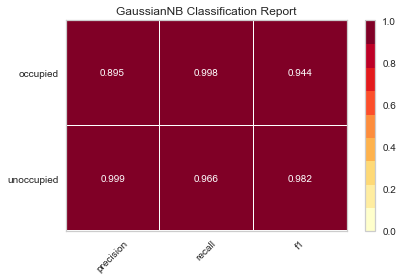

In [366]:
# Instantiate the classification model and visualizer 
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()     

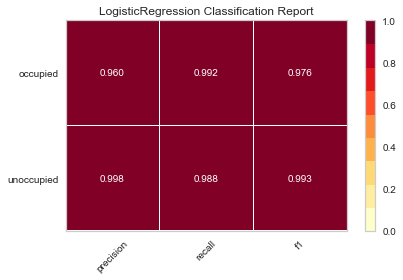

In [367]:
# Instantiate the classification model and visualizer 
bayes = LogisticRegression()
visualizer = ClassificationReport(bayes, classes=classes)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()   

### Confusion Matrix

The ConfusionMatrix visualizer displays the accuracy score of the model, i.e., it shows how each of the test values predicted classes compare to their actual classes.


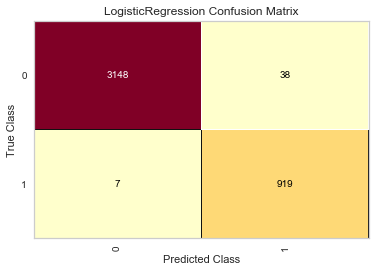

In [368]:
logReg = LogisticRegression()
visualizer = ConfusionMatrix(logReg)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 

g = visualizer.poof()     

## Regression Evaluation




In [369]:
# Use Yellowbrick to load the concrete dataset
concrete_data = pd.read_csv('data/concrete/concrete.csv')

concrete_data.head()


,cement,slag,ash,water,splast,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [353]:
# Save feature names as a list and target variable as a string
feature_names_reg = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name_reg = 'strength'

# Get the X and y data from the DataFrame 
X_reg = concrete_data[feature_names_reg]
y_reg = concrete_data[target_name_reg]

# Create the train and test data 
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2)

## Residuals Plot

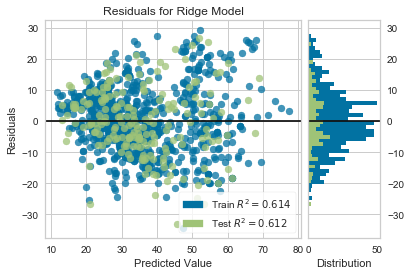

In [370]:
# Instantiate the linear model and visualizer 
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_reg_train, y_reg_train)  # Fit the training data to the visualizer
visualizer.score(X_reg_test, y_reg_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

## Prediction Error Plot

The Prediction Error Visualiser visualizes prediction errors as a scatterplot of the predicted & actual values. We can then visualize the line of best fit & compare it to the 45º line.

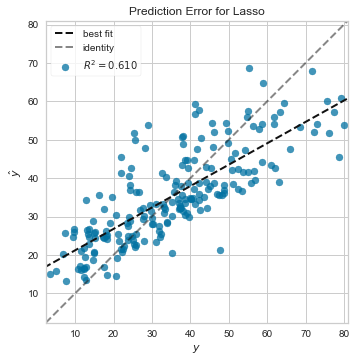

In [358]:
# Instantiate the linear model and visualizer 
model = Lasso()
visualizer = PredictionError(model, size = (800,400))

visualizer.fit(X_reg_train, y_reg_train)  # Fit the training data to the visualizer
visualizer.score(X_reg_test, y_reg_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

## Alpha Selection Visualizer

The AlphaSelection Visualizer demonstrates how different values of alpha influence model selection during the regularization of linear models. A higher value of alpha denotes a less complex model and vice versa, decreasing the error due to variance (overfit). However, alphas that are too high increase the error due to bias (underfit). Therefore, it is important to choose an optimal alpha such that the error is minimized in both directions.

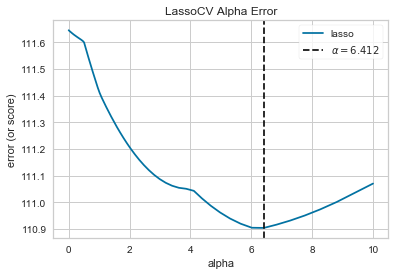

In [359]:
import numpy as np

from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)

visualizer.fit(X_reg_train, y_reg_train)
g = visualizer.poof()



In [301]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 1960-01-01 to 1960-01-01
Data columns (total 3 columns):
Link          5 non-null int64
Country       5 non-null object
Population    5 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 160.0+ bytes


In [322]:
df.head()

,Link,Country,Population,Year
0,1,Aruba,0.05,1960-01-01
1,1,Afghanistan,9.00,1960-01-01
2,1,Angola,5.64,1960-01-01
3,1,Albania,1.61,1960-01-01
4,1,Andorra,0.01,1960-01-01


In [324]:

df.pivot_table(['Link','Population','Country'],
               ['Year'], aggfunc='mean')


,Link,Population
Year,,
1960-01-01,1,3.262


In [313]:
df.columns

Index(['Link', 'Country', 'Population', 'Year'], dtype='object')